In [1]:
using IJulia
installkernel("Julia (10 threads)", env=Dict("JULIA_NUM_THREADS"=>"10"))
# Run this once to install a Julia kernel with more threads
Threads.nthreads() # Check the number of threads

┌ Info: Installing 'Julia (10 threads) 1.11.5' kernelspec in /Users/dana/Library/Jupyter/kernels/julia-_10-threads_-1.11
└ @ IJulia /Users/dana/.julia/packages/IJulia/0TYRi/deps/kspec.jl:120


1

---
## Import modules
Relevant packages imported inside the modules

In [ ]:
include("../src/ProtonShape.jl")
using .ProtonShape

In [ ]:
include("../src/plotrecipes.jl")
include("../src/data.jl")

read_coherent_data (generic function with 1 method)

---
### GBW model
Coherent cross section, no fluctuations

In [3]:
t_range, dσdt, dσdt_err = diffractive("coh", "GWB", params_wavefct, params_mc; p_gbw=params_gbw, p_cq=params_cq)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:18


([0.0, 0.012345679012345678, 0.04938271604938271, 0.1111111111111111, 0.19753086419753085, 0.308641975308642, 0.4444444444444444, 0.6049382716049383, 0.7901234567901234, 1.0], [251.7781165240706, 235.17482875846935, 202.40540736915398, 152.5346667545792, 102.7330066569185, 63.62837011661525, 35.13748025715327, 16.60154834294675, 7.25512106977837, 3.015577787700207], [1.363454993934266, 1.3944958601804311, 1.3048959019851303, 0.8438023317473768, 0.7096754611563247, 0.4592679807305299, 0.3349882660470392, 0.1646278700717125, 0.09456617852385914, 0.05803134849595242])

In [ ]:
tcent_hera, dσcoh_hera, Δtot_hera = read_coherent_data("../data/jpsi_coh_hera.txt")

([0.02, 0.08, 0.14, 0.21, 0.3, 0.41, 0.58, 0.9], [336.0, 240.5, 161.2, 111.4, 70.4, 41.2, 18.0, 4.83], [18.0, 12.9, 9.3, 7.0, 5.1, 3.7, 2.7, 1.75])

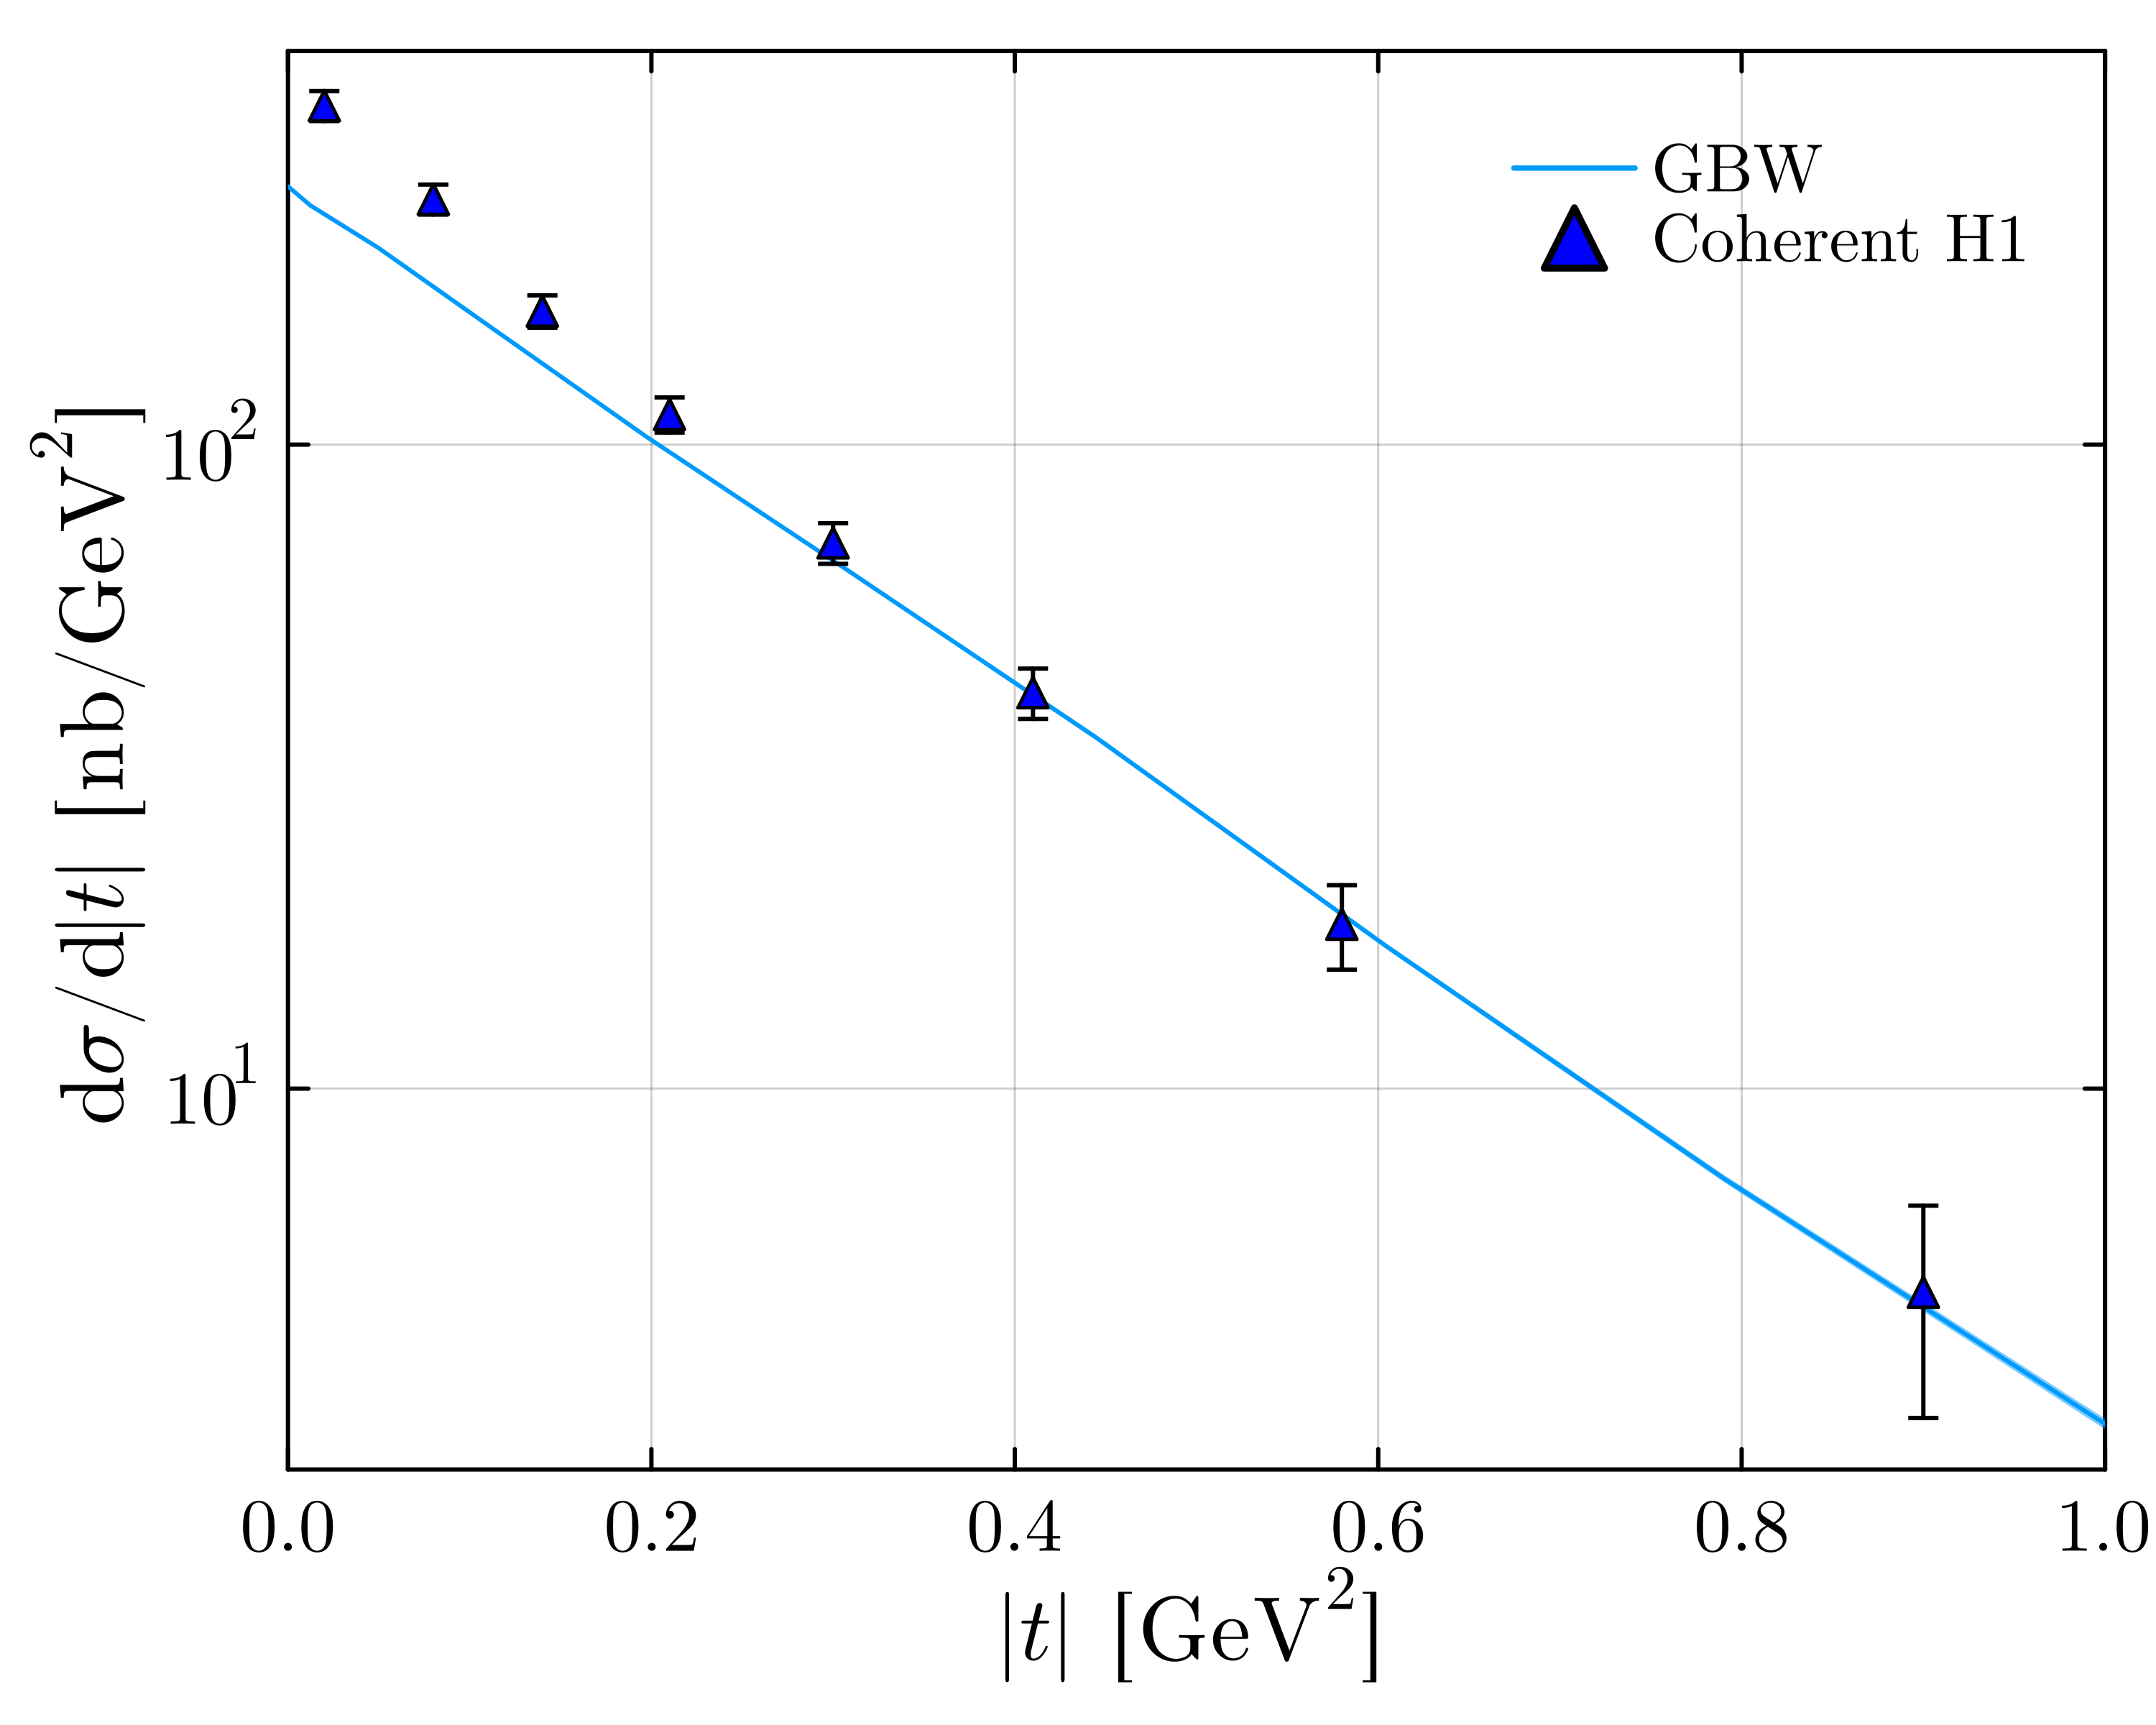

In [5]:
data = CoherentMCData(t_range, dσdt, dσdt_err, tcent_hera, dσcoh_hera, Δtot_hera)
plot(data)

---
### Constituent quark model
Coherent + incoherent cross section, EbE fluctuations

In [ ]:
using Serialization
data = deserialize("../results/jspi_coh_incoh_hera_cq_err.jls")

(t_range = [0.0, 0.011080332409972297, 0.04432132963988919, 0.09972299168975068, 0.17728531855955676, 0.27700831024930744, 0.39889196675900274, 0.5429362880886426, 0.709141274238227, 0.8975069252077561, 1.1080332409972298, 1.3407202216066483, 1.595567867036011, 1.8725761772853187, 2.1717451523545703, 2.4930747922437675, 2.836565096952908, 3.2022160664819945, 3.5900277008310244, 4.0], dσdt_coh = [179.34702264449822, 171.31678230209533, 150.78667824032772, 120.77086149931321, 88.39286322968461, 59.3953556614876, 36.55113872027574, 20.46387790208109, 10.611188871533143, 4.94028930814472, 2.104023945343905, 0.7785342883099591, 0.25452433558486065, 0.07363481601556872, 0.025981417883795082, 0.0219733103199393, 0.024207942419858193, 0.02046263446413948, 0.01688386376037362, 0.011075139203221793], dσdt_coh_err = [0.6882062668340712, 3.350291985627613, 6.002096295508171, 7.6297836717228895, 8.063923156021584, 7.478146076629721, 6.176019074616563, 4.6147213495797885, 3.1721621869406866, 1.98393

In [2]:
(; t_range, dσdt_coh, dσdt_coh_err, dσdt_incoh, dσdt_incoh_err,
   tcent_coh_hera, dσdt_coh_hera, Δtot_coh_hera,
   tcent_incoh_hera, dσdt_incoh_hera, Δtot_incoh_hera,
   params_wavefct, params_gbw, params_cq, params_mc) = data

(t_range = [0.0, 0.011080332409972297, 0.04432132963988919, 0.09972299168975068, 0.17728531855955676, 0.27700831024930744, 0.39889196675900274, 0.5429362880886426, 0.709141274238227, 0.8975069252077561, 1.1080332409972298, 1.3407202216066483, 1.595567867036011, 1.8725761772853187, 2.1717451523545703, 2.4930747922437675, 2.836565096952908, 3.2022160664819945, 3.5900277008310244, 4.0], dσdt_coh = [179.34702264449822, 171.31678230209533, 150.78667824032772, 120.77086149931321, 88.39286322968461, 59.3953556614876, 36.55113872027574, 20.46387790208109, 10.611188871533143, 4.94028930814472, 2.104023945343905, 0.7785342883099591, 0.25452433558486065, 0.07363481601556872, 0.025981417883795082, 0.0219733103199393, 0.024207942419858193, 0.02046263446413948, 0.01688386376037362, 0.011075139203221793], dσdt_coh_err = [0.6882062668340712, 3.350291985627613, 6.002096295508171, 7.6297836717228895, 8.063923156021584, 7.478146076629721, 6.176019074616563, 4.6147213495797885, 3.1721621869406866, 1.98393

In [ ]:
include("../src/ProtonShape.jl")
using .ProtonShape

In [ ]:
t_range, dσdt_coh, dσdt_coh_err, dσdt_incoh, dσdt_incoh_err = diffractive("coh+incoh", "CQ", params_wavefct, params_mc; p_gbw=params_gbw, p_cq=params_cq, run_threads=true)

In [ ]:
include("../src/plotrecipes.jl")
include("../src/data.jl")

read_coherent_data (generic function with 1 method)

In [4]:
tcent_coh_hera, dσdt_coh_hera, Δtot_coh_hera = read_coherent_data("jpsi_coh_hera.txt")
tcent_incoh_hera, dσdt_incoh_hera, Δtot_incoh_hera = read_coherent_data("jpsi_incoh_hera.txt")

([0.1, 0.29, 0.52, 0.78, 1.12, 1.55, 2.21, 3.3, 5.71], [47.3, 43.8, 36.7, 27.8, 16.8, 10.05, 6.04, 2.8, 0.875], [6.7, 6.0, 5.1, 4.2, 2.59, 1.56, 0.68, 0.38, 0.178])

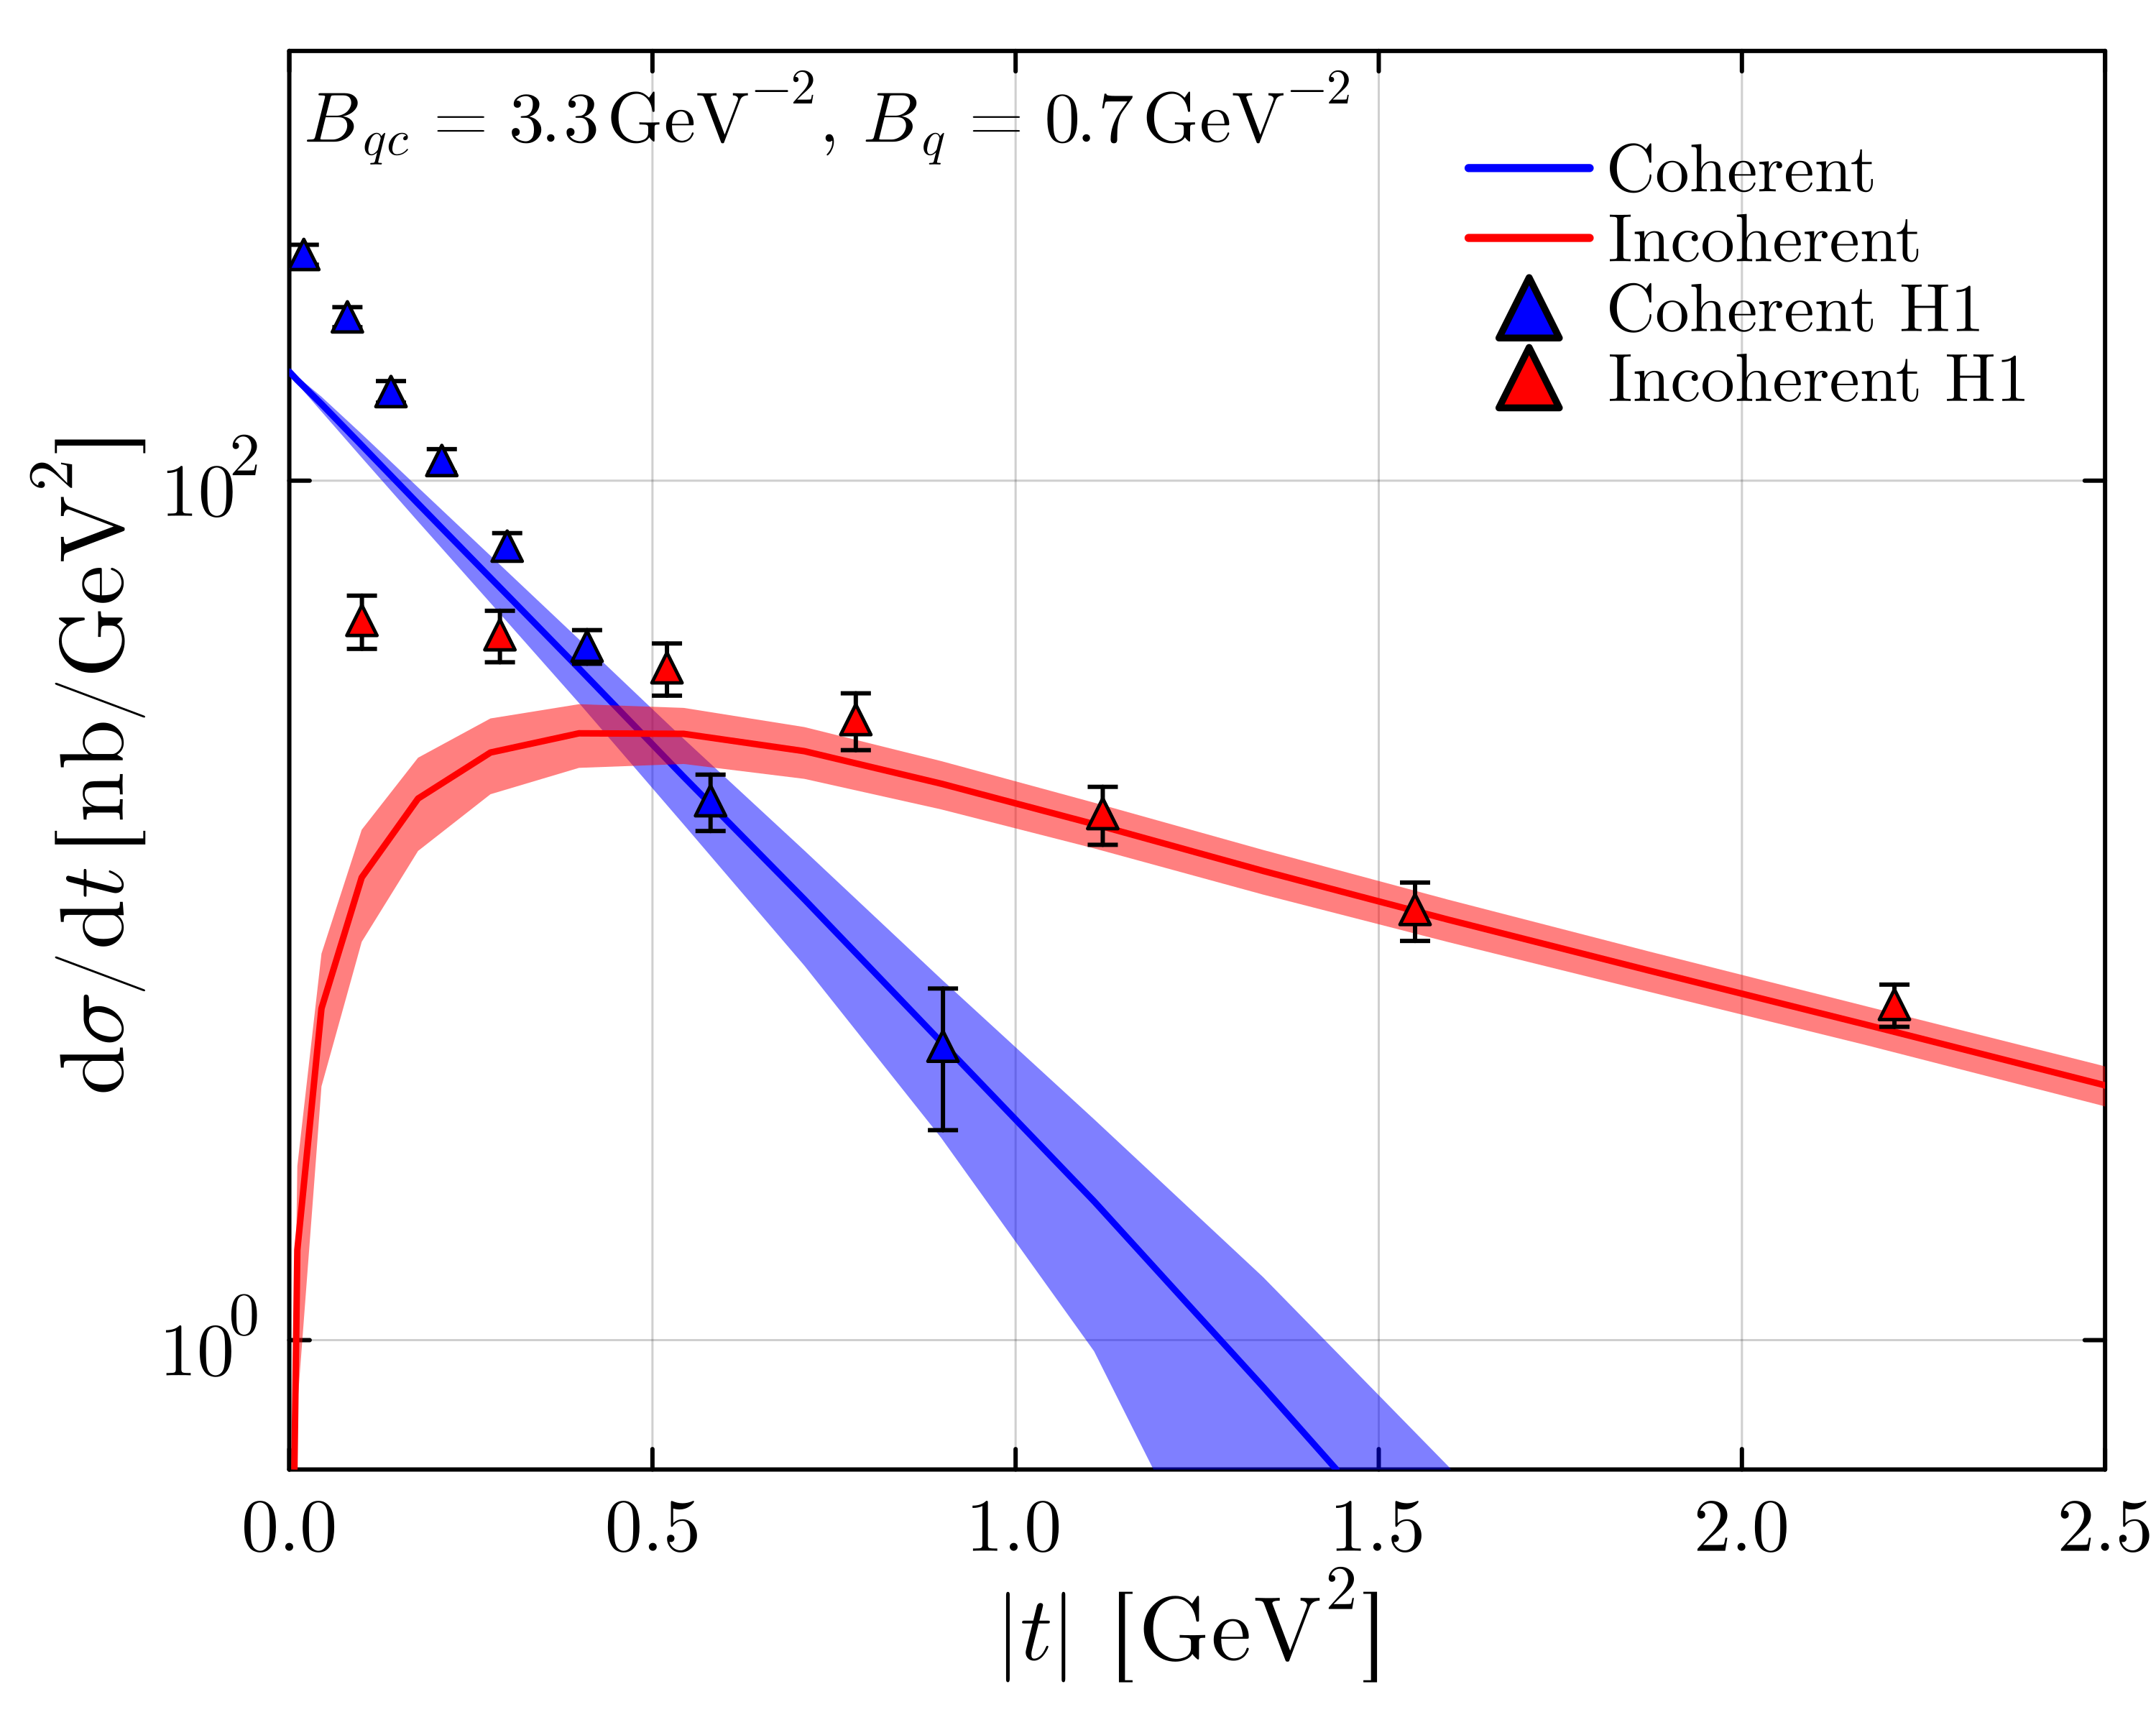

In [21]:
data = CohIncohMCData(t_range, dσdt_coh, dσdt_coh_err, dσdt_incoh, dσdt_incoh_err, tcent_coh_hera, dσdt_coh_hera, Δtot_coh_hera, tcent_incoh_hera, dσdt_incoh_hera, Δtot_incoh_hera)
p = plot(data)
ylims!(p, (0.5, 1000))

annotate!(p, (0.75, 700, Plots.text(L"B_{qc}=3.3\,\mathrm{GeV^{-2}},\,B_{q}=0.7\,\mathrm{GeV^{-2}}", 11)))
display(p)

In [ ]:
savefig(p, "../plots/jpsi_coh_incoh_hera_cq_err.png")

"/Users/dana/Work/protonshape/jpsi_coh_incoh_hera_cq_err.png"

In [5]:
using Serialization

In [ ]:
save_data = (; t_range, dσdt_coh, dσdt_coh_err, dσdt_incoh, dσdt_incoh_err,
    tcent_coh_hera, dσdt_coh_hera, Δtot_coh_hera,
    tcent_incoh_hera, dσdt_incoh_hera, Δtot_incoh_hera,
    params_wavefct, params_gbw, params_cq, params_mc)
serialize("../results/jspi_coh_incoh_hera_cq_err.jls", save_data)

---
## Check functions

#### Photon vector meson wavefunction overlap
The expressions are taken from [arXiv:hep-ph/0606272](https://arxiv.org/abs/hep-ph/0606272)
$$\begin{aligned}(\Psi^*_V\Psi)_T&=\hat{e}_f e\dfrac{N_c}{\pi z(1-z)}\left\{m_f^2 K_0(\epsilon r)\phi_T(r,z)-[z^2+(1-z)^2]\epsilon K_1(\epsilon r)\partial_r \phi_T(r,z)\right\}\\
(\Psi^*_V\Psi)_L&=\hat{e}_f e\dfrac{N_c}{\pi}2Qz(1-z)K_0(\epsilon r)\left[M_V\phi_L(r,z)+\delta \dfrac{m_f^2-\nabla_r^2}{M_vz(1-z)}\phi_L(r,z)\right]
\end{aligned}$$

##### Boosted Gaussian model
$$\phi_{T,L}(r,z)=\mathcal{N}_{T,L}z(1-z)\exp\left(-\dfrac{m_f^2\mathcal{R}^2}{8z(1-z)}-\dfrac{2z(1-z)r^2}{\mathcal{R}^2}+\dfrac{m_f^2\mathcal{R}^2}{2}\right)$$

The parameters $\mathcal{N}_{T,L}$ and $\mathcal{R}$ are determined from the normalization and decay width conditions. 

In [3]:
ϕ(r, z, "T", params_wavefct)

0.578z*(1 - z)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z))

In [4]:
ϕ(r, z, "L", params_wavefct)

0.575z*(1 - z)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z))

In [5]:
ΨᵥΨ(r, z, "T", params_wavefct)

(0.5784236293296671(1.1328799999999997z*(1 - z)*SpecialFunctions.besselk(0, 1.4r)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z)) - 1.407304347826087r*(z^2)*(-(z^2) - ((1 - z)^2))*((1 - z)^2)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z))*SpecialFunctions.besselk(1, 1.4r))) / (z*(1 - z))

In [6]:
ΨᵥΨ(r, z, "L", params_wavefct)

0.0

---

#### GBW dipole cross section

$$\sigma_{q\overline{q}}^\mathrm{GBW}(x,r)=\sigma_0 \left(1-\mathrm{e}^{-r^2 Q_s^2(x)/4}\right)$$

where $Q_s^2(x)=(x_0/x)^{\lambda_{\mathrm{GBW}}}$.

Let us introduce an impact parameter dependence 

$$\dfrac{\mathrm{d}\sigma_{q\overline{q}}}{\mathrm{d}^2\boldsymbol{b}}=\sigma_0\left(1-\mathrm{e}^{-\mathcal{N}r^2 Q_s^2(x,b)}\right)$$

where $Q_s^2(x,b)=(x_0/x)^{\lambda_{\mathrm{GBW}}}T(b)$ with a Gaussian thickness function

$$T(b)=\dfrac{1}{2\pi B_p}\mathrm{e}^{-\frac{b^2}{2B_p}}$$

Here the parameter $B_p$ is the proton width. Here $\mathcal{N}$ is a normalization factor chosen to fit $\mathrm{d}\sigma/\mathrm{d}t$.

In [7]:
Qₛ(params_gbw)

0.5915964371087449

In [8]:
T(b, params_gbw)

0.039788735772973836exp((-1//8)*(b^2))

In [9]:
gbwdipole(r, b, params_gbw)

74.47751(1 - exp(-0.17406892726838896(r^2)*exp((-1//8)*(b^2))))

---
#### Coherent cross section
Coherent diffraction cross section

$$\dfrac{\mathrm{d}\sigma^{\gamma^*p\rightarrow Vp}_\mathrm{c}}{\mathrm{d}t}=\dfrac{1}{16\pi}\left|\langle\mathcal{A}_{T,L}^{\gamma^*p\rightarrow Vp}(x_{\mathbb{P}}, Q^2, \boldsymbol{\Delta})\rangle\right|^2$$

Assuming angle independence of the cross section and wavefunctions, the scattering amplitude simplifies to

$$\begin{aligned}\mathcal{A}_{T,L}^{\gamma^*p\rightarrow Vp}(x_{\mathbb{P}}, Q^2, \boldsymbol{\Delta})=&\mathrm{i}\pi\int\limits_{r_\mathrm{min}}^{r_\mathrm{max}} r\,\mathrm{d} r\int_{b_\mathrm{min}}^{b_\mathrm{max}} b \,\mathrm{d} b \int_0^1\mathrm{d}z\, (\Psi^*\Psi_V)_{T,L}(Q^2, r,z)\\ &\times \dfrac{\mathrm{d}\sigma^p_{\mathrm{dip}}}{\mathrm{d}^2 \boldsymbol{b}}(b, r, x_{\mathbb{P}})J_0(b\Delta)J_0((1-z)r\Delta)\end{aligned}$$
where we used $\int_0^{2\pi}d\theta e^{-i a \cos\theta}=2\pi J_0(a)$, with $J_0$ the Bessel function of first kind.

In [10]:
Agbw(r, b, z, Δ, params_wavefct, params_gbw)

(43.07955163763657b*r*(1.1328799999999997z*(1 - z)*SpecialFunctions.besselk(0, 1.4r)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z)) - 1.407304347826087r*(z^2)*(-(z^2) - ((1 - z)^2))*((1 - z)^2)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z))*SpecialFunctions.besselk(1, 1.4r))*SpecialFunctions.besselj(0, b*Δ)*SpecialFunctions.besselj(0, r*(1 - z)*Δ)*(1 - exp(-0.17406892726838896(r^2)*exp((-1//8)*(b^2))))) / (z*(1 - z))

---
#### Constituent quark model
Quark positions $\vec{b}_i$ sampled from a Gaussian distribution with width $B_{qc}$, with $i\in\overline{1, N_q}$ where $N_q$ is the number of constituent quarks.

Density for each quark $\displaystyle T_q(\vec{b})=\dfrac{1}{2\pi B_q}\mathrm{e}^{-\vec{b}^2/(2 B_q)}$. Total proton density $\displaystyle T_p(\vec{b})=\dfrac{1}{N_q}\sum_{i}^{1,N_q}T_q(\vec{b}-\vec{b}_i)$.

In [ ]:
include("../src/CrossSection.jl")
using .CrossSection
include("../src/plotrecipes.jl")
include("../src/data.jl")

read_coherent_data (generic function with 1 method)

In [36]:
test_bqc = sample_bqc(params_cq)

3-element Vector{Tuple{Float64, Float64}}:
 (-2.3865941122887944, 0.7593800497250138)
 (-2.548103756323792, 0.9924919172786647)
 (1.0869433291888742, -2.766002042231631)

In [37]:
test_b, test_θb = 1.0, π / 4
Tp(test_b, test_θb, test_bqc, params_cq)

0.000130536391582026

In [38]:
grid_min = -5.0
grid_max = 5.0
n_grid = 200
bx_vals = range(grid_min, grid_max, length=n_grid)
by_vals = range(grid_min, grid_max, length=n_grid)

-5.0:0.05025125628140704:5.0

In [39]:
Tp_vals = compute_Tp_grid(bx_vals, by_vals, sample_bqc(params_cq), params_cq)

200×200 Matrix{Float64}:
 7.6291e-9    9.81309e-9   1.25768e-8   …  1.18616e-10  9.34276e-11
 9.5649e-9    1.2303e-8    1.57681e-8      1.59877e-10  1.25927e-10
 1.19487e-8   1.53693e-8   1.96978e-8      2.14716e-10  1.69122e-10
 1.48728e-8   1.91305e-8   2.45184e-8      2.87329e-10  2.26316e-10
 1.84459e-8   2.37265e-8   3.04088e-8      3.83116e-10  3.01764e-10
 2.27951e-8   2.93206e-8   3.75785e-8   …  5.09001e-10  4.00919e-10
 2.80682e-8   3.61033e-8   4.62714e-8      6.73819e-10  5.30741e-10
 3.44367e-8   4.42949e-8   5.677e-8        8.88803e-10  7.00077e-10
 4.2098e-8    5.41494e-8   6.94e-8         1.16817e-9   9.20126e-10
 5.12785e-8   6.5958e-8    8.45343e-8      1.52983e-9   1.205e-9
 6.2236e-8    8.00523e-8   1.02598e-7   …  1.99627e-9   1.57241e-9
 7.52631e-8   9.68087e-8   1.24074e-7      2.59559e-9   2.04448e-9
 9.06892e-8   1.16651e-7   1.49504e-7      3.36272e-9   2.64875e-9
 ⋮                                      ⋱               
 6.40187e-18  8.23468e-18  1.05541e-17  

In [40]:
ħc = 0.197326 # [GeV*fm], convert GeV^-1 to fm
x_vals = bx_vals .* ħc
y_vals = by_vals .* ħc

-0.98663:0.009915879396984925:0.98663

In [ ]:
# default(fontfamily="Computer Modern", framestyle=:box, labelfontsize=14, tickfontsize=12, size=(400,400))
default(fontfamily="Computer Modern", size=(400, 400), labelfontsize=14, tickfontsize=12)
	
h = heatmap(x_vals, y_vals, Tp_vals, xlabel=L"x\,\,\mathrm{[fm]}", ylabel=L"y\,\,\mathrm{[fm]}", title=L"T_p\,(b_x, b_y)", color=reverse(cgrad(:beach)), colorbar=:true, xlims=(-1,1), ylims=(-1, 1), dpi=600)

In [42]:
savefig(h, "Tp_config6.png")

"/Users/dana/Work/protonshape/Tp_config6.png"

---
#### Scattering amplitude for constituent quark model

The scattering amplitude simplifies to

$$\begin{aligned}\mathcal{A}_{T,L}^{\gamma^*p\rightarrow Vp}(x_{\mathbb{P}}, Q^2, \boldsymbol{\Delta})=&\frac{\mathrm{i}}{2}\int\limits_{r_\mathrm{min}}^{r_\mathrm{max}} r\,\mathrm{d} r\int_{b_\mathrm{min}}^{b_\mathrm{max}} b \,\mathrm{d} b \int_{0}^{2\pi} \mathrm{d} \theta_b \int_0^1\mathrm{d}z\, (\Psi^*\Psi_V)_{T,L}(Q^2, r,z)\\ &\times \dfrac{\mathrm{d}\sigma^p_{\mathrm{dip}}}{\mathrm{d}^2 \boldsymbol{b}}(r, b, \theta_b, x_{\mathbb{P}})\mathrm{e}^{-\mathrm{i}b\Delta\cos\theta_b}J_0((1-z)r\Delta)\end{aligned}$$
where we used $\int_0^{2\pi}d\theta e^{-i a \cos\theta}=2\pi J_0(a)$, with $J_0$ the Bessel function of first kind.

In [4]:
Aqc(r, b, θb, test_bqc, z, Δ, Tp, params_wavefct, params_gbw, params_cq, "real")

(43.07955163763657b*r*(1.1328799999999997z*(1 - z)*SpecialFunctions.besselk(0, 1.4r)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z)) - 1.407304347826087r*(z^2)*(-(z^2) - ((1 - z)^2))*((1 - z)^2)*exp(2.2539999999999996 + -4.507999999999999 / (8z*(1 - z)) - 0.8695652173913044(r^2)*z*(1 - z))*SpecialFunctions.besselk(1, 1.4r))*(1 - exp(-1.4582764349990047(r^2)*(0.3183098861837907exp(-((0.35262879156714444 + b*sin(θb))^2) - ((2.52111629487142 + b*cos(θb))^2)) + 0.3183098861837907exp(-((-0.1860893758006681 + b*sin(θb))^2) - ((-2.083771955872631 + b*cos(θb))^2)) + 0.3183098861837907exp(-((-1.3252248188292477 + b*sin(θb))^2) - ((-0.5314086341837558 + b*cos(θb))^2)))))*cos(-b*cos(θb)*Δ)*SpecialFunctions.besselj(0, r*(1 - z)*Δ)) / (z*(1 - z))